In [21]:
#import some libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
#this sample represents the evolution of the system states in time

#this sample represents a non repairable system, i.e. it assesses reliability
#sample =["up","up","up","up","down","down"]

#this sample represents a repairable system, i.e. it assesses availability 
sample =["up","up","up","up","down","down","up"]

#this sample represents a repairable system at a more refined time scale, i.e. it assesses availability 
sample =["up","up","up","up","up","up","up","up","up","up","up","up","up","up","up","up","down","down","down","down","down","down","down","down","up"]

#this sample represents a repairable multiple state system, i.e. it assesses availability of some configuration
#sample =["up/up","up/up","up/down","up/up","down/up","up/up","up/down","up/down","down/down","up/down","down/down","down/up","down/down","down/up","down/up","up/up","up/up","up/up"]

#this is an incomplete sample as the transitions from down/down have not been observed
#sample =["up/up","up/up","up/down","up/up","down/up","up/up","up/down","up/down","up/down","up/up","down/up","down/up","down/down"]

#this sample represents a repairable multiple state system at a higher time resolution, i.e. it assesses availability of some configuration
#sample =["up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up",
 #        "up/down","up/down","up/down","up/down","up/down","up/down","up/up","up/up","up/up","up/up","up/up","up/up",
  #       "down/up","down/up","down/up","down/up","down/up","down/up","up/up","up/up","up/up","up/up","up/up","up/up",
   #      "up/down","up/down","up/down","up/down","up/down","up/down","up/down","up/down","up/down","up/down","up/down","up/down",
    #     "down/down","down/down","down/down","down/down","down/down","down/down","up/down","up/down","up/down","up/down","up/down","up/down",
     #    "down/down","down/down","down/down","down/down","down/down","down/down","down/up","down/up","down/up","down/up","down/up","down/up",
      #   "down/down","down/down","down/down","down/down","down/down","down/down","down/up","down/up","down/up","down/up","down/up","down/up","down/up","down/up","down/up","down/up","down/up","down/up",
       #  "up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up","up/up"]

#print("survey of state transitions: \n",tuple(zip(sample,sample[1:])),"\n")

In [39]:
#define state transition matrix

n=pd.DataFrame(sample)[0].unique()
n=n.tolist()
n.sort(reverse=True)
print("survey of the unique states in the sample, sorted descending: ",n)

tm=pd.DataFrame(0,columns=n,index=n)
print("empty state transition matrix: \n",tm)

survey of the unique states in the sample, sorted descending:  ['up', 'down']
empty state transition matrix: 
       up  down
up     0     0
down   0     0


In [40]:
# load the state transition matrix 

for (i,j) in zip(sample,sample[1:]):
    tm.loc[i,j] += 1
    
tm=tm.apply(lambda x: x/x.sum(), axis="columns")

print("print the transition matrix, the proportions in each row sum up to one:\n", tm)

print the transition matrix, the proportions in each row sum up to one:
           up    down
up    0.9375  0.0625
down  0.1250  0.8750


In [41]:
#define the initial state of the system

s = pd.Series(0,index=n)
s[1]=1
print("check whether the values in this series add up to one:\n",s)

#calculate the evolution of the system states in time

t=40 #define the time interval of interest

em=pd.DataFrame()

for i in range(t):
    em=em.append(s,ignore_index=True)
    s=tm.T.dot(s.T)
    
print("the evolution matrix, given the initial state and the state transition matrix:\n",em)


check whether the values in this series add up to one:
 up      0
down    1
dtype: int64
the evolution matrix, given the initial state and the state transition matrix:
         down        up
0   1.000000  0.000000
1   0.875000  0.125000
2   0.773438  0.226562
3   0.690918  0.309082
4   0.623871  0.376129
5   0.569395  0.430605
6   0.525133  0.474867
7   0.489171  0.510829
8   0.459951  0.540049
9   0.436211  0.563789
10  0.416921  0.583079
11  0.401248  0.598752
12  0.388514  0.611486
13  0.378168  0.621832
14  0.369761  0.630239
15  0.362931  0.637069
16  0.357382  0.642618
17  0.352872  0.647128
18  0.349209  0.650791
19  0.346232  0.653768
20  0.343814  0.656186
21  0.341849  0.658151
22  0.340252  0.659748
23  0.338955  0.661045
24  0.337901  0.662099
25  0.337044  0.662956
26  0.336349  0.663651
27  0.335783  0.664217
28  0.335324  0.664676
29  0.334951  0.665049
30  0.334647  0.665353
31  0.334401  0.665599
32  0.334201  0.665799
33  0.334038  0.665962
34  0.333906  0.666094
35 

In [36]:
#add a columns that defines the upstate of the system

sem=em.copy()
sem["up_system_1"]=em.iloc[:,len(em.iloc[0,:])-1]
sem["up_system_2"]=1-em.iloc[:,0]

#print("the evolution of the upstate by two definitions:\n",sem)

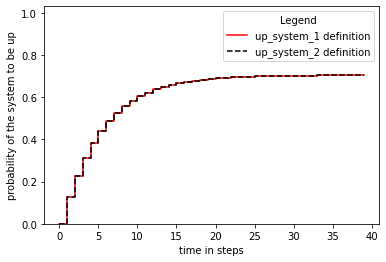

In [37]:
#plot the system upstate in a graph

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1) # one row, one column, first plot

line, = ax1.step(sem.index,
         sem["up_system_1"],
         where="post",
        label="up_system_1 definition",
        color="red")

line, = ax1.step(sem.index,
         sem["up_system_2"],
         where="post",
        label="up_system_2 definition",
        color="black",
        linestyle="dashed")

ax1.set_ylim([0, 1.03])
xtext = ax1.set_xlabel('time in steps') # returns a Text instance
ytext = ax1.set_ylabel('probability of the system to be up')

plt.legend(title='Legend')
#plt.savefig("C:/Users/Chris/Pythonprojects/RAMS/figures/StateTransitionPlot01.png")
plt.show()